Implementaiton for vaderSentiment
see https://vadersentiment.readthedocs.io/en/latest/index.html


For sentiment analysis, using uncleaned version 
key difference is not lowercaseing everything, 
adding a period between title and article concatenation, not reshortening)

In [235]:
#import json
import pandas as pd
from nltk import tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
import re
import regex
import matplotlib.pyplot as plt

In [190]:
#df = pd.read_csv('../data/metadata_w_2020articles_cleaned.csv')
# need to take only full sentences when using text??

dfraw = pd.read_json('../data/metadata_w_2020articles.json')


In [191]:
df = dfraw.T.reset_index().rename(columns={'index':'uuid'})

In [192]:
df.columns

Index(['uuid', 'source', 'year', 'article_text', 'title'], dtype='object')

In [193]:
#remove certain characters from title
df['title'] = df['title'].apply(lambda x: re.sub(r'[\n\t\r]', '', x))
df['article_title'] = df['article_title'].apply(lambda x: re.sub(r'[\n\t\r]', '', x))

#clean out len 0 text!


In [213]:
 #article_length  = len(article['article_text'])
#print(len(df[df['article_text'].str.len() == 0]))

df = df[df['article_text'].str.len() > 0]


In [214]:
#missing_space_regex = regex.compile(r'.*?\p{P}\S')

In [215]:
df.head(5)

,uuid,source,year,article_text,title,corrected_article_text,title_text,average_sentiment_title
0,bcbc6bb2-406e-11ee-a96e-33dec8f414a2,wp,2020,President Trump on Monday said he was “proud” ...,"Trump shifts tone, says he’s ‘proud’ of Fed am...",President Trump on Monday said he was “proud” ...,"Trump shifts tone, says he’s ‘proud’ of Fed am...",-0.3612
1,cfb4ce29-406e-11ee-a96e-33dec8f414a2,wp,2020,U.S. intelligence reportedly indicates Iran’s ...,"Iran paid bounties for targeting US troops, in...",U.S. intelligence reportedly indicates Iran’s ...,"Iran paid bounties for targeting US troops, in...",0.4767
2,db9f408f-406e-11ee-a96e-33dec8f414a2,wp,2020,U.S. forces have rescued an American citizen h...,US forces rescue American citizen held hostage...,U.S. forces have rescued an American citizen h...,US forces rescue American citizen held hostage...,0.5106
3,e7b340f7-406e-11ee-a96e-33dec8f414a2,thehill,2020,President Trump on Tuesday evening blasted Con...,"Trump slams relief bill, calls on Congress to ...",President Trump on Tuesday evening blasted Con...,"Trump slams relief bill, calls on Congress to ...",0.6597
4,a43934fc-411f-11ee-a96e-33dec8f414a2,thehill,2020,Japanese tennis star Naomi Osaka has withdrawn...,Naomi Osaka withdraws from French Open to focu...,Japanese tennis star Naomi Osaka has withdrawn...,Naomi Osaka withdraws from French Open to focu...,0.0000


In [216]:
print(df['title'][0])

print(df['article_text'][0])

Trump shifts tone, says he’s ‘proud’ of Fed amid coronavirus turmoil
President Trump on Monday said he was “proud” of Federal Reserve Chairman Jerome Powell’s handling of the economic turmoil brought on by the coronavirus pandemic, backing down from more than a year of criticizing his hand-picked Fed chief and threatening his job security. Trump praised Powell during a Monday evening briefing at the White House after the Fed that morning drastically expanded its efforts to protect the U.S. economy and financial markets amid the coronavirus pandemic. “I really think he’s caught


In [217]:
# Define the regular expression pattern
#missing_space_regex = re.compile(r'(?<=[.?!])(?=[^\s\d])')
#missing_space_regex = re.compile(r'(?<=[.?!])(?<![a-z])(?=[A-Z])(?![\d\s])')
#missing_space_regex = re.compile(r'(?<=[a-z]{2})(?<= [?.!])(?=[A-Z])(?![\d\s])')
missing_space_regex = re.compile(r'(?<=[a-z][?.!])(?=[A-Z])(?![\d\s])')

#missing_space_regex_quote = re.compile(r'(?<=[a-z]{2})(?<= [.!?])(?=["“])(?=[A-Z]{2})')
      #missing_space_regex = re.compile(r'(?<=[a-z]{2})(?<= [?.!])(?=["“])(?=[A-Z])(?![\d\s])')
#missing_space_regex_quote = re.compile(r'(?<=[a-z]{2})(?<= [?.!])(?=["“])(?=[A-Z])(?![\d\s])')
missing_space_regex_quote = re.compile(r'(?<=[a-z][?.!])(?=["“][A-Z])')
#missing_space_regex_quote = re.compile(r'(?<=[a-z][?.!])(?=["“])(?=[A-Z])(?![\d\s])')
# Function to add missing spaces in text
text = 'ces."Big w'

def add_missing_spaces(text):
    return missing_space_regex.sub(' ', text)
    
def add_missing_spaces_quote(text): 
    return missing_space_regex_quote.sub(' ',text)

# With quotes, it hard to program which sentence a quote should be associated with : 
# i.e., .. as a “big win” for U.S. special forces.“Big win for our very elite ...
# Given that whole problem with spaces not separating sentences seems to occur 
# i add a space before the quotes. 

print(add_missing_spaces_quote(text))
# Apply the function to the 'text' column
df['corrected_article_text'] = df['article_text'].apply(add_missing_spaces)
df['corrected_article_text'] = df['corrected_article_text'].apply(add_missing_spaces_quote)



ces. "Big w


/var/folders/z3/7313_vxj6t1cpgcl_20j69cm0000gn/T/ipykernel_13124/2741456891.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['corrected_article_text'] = df['article_text'].apply(add_missing_spaces)
/var/folders/z3/7313_vxj6t1cpgcl_20j69cm0000gn/T/ipykernel_13124/2741456891.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['corrected_article_text'] = df['corrected_article_text'].apply(add_missing_spaces_quote)


In [218]:
test_num = 3

print(df['corrected_article_text'][test_num])
print(df['article_text'][test_num])

President Trump on Tuesday evening blasted Congress over the already-passed COVID-19 relief package and called on both chambers to send him a new bill increasing stimulus checks from $600 to $2,000.The president expressed dismay with the $2.3 trillion package that Congress passed Monday, which includes $900 billion in coronavirus relief and $1.4 trillion to fund the government until October, conflating the two bills and saying the spending goals were misguided. “A few months ago, Congress started negotiation
President Trump on Tuesday evening blasted Congress over the already-passed COVID-19 relief package and called on both chambers to send him a new bill increasing stimulus checks from $600 to $2,000.The president expressed dismay with the $2.3 trillion package that Congress passed Monday, which includes $900 billion in coronavirus relief and $1.4 trillion to fund the government until October, conflating the two bills and saying the spending goals were misguided. “A few months ago, C

In [219]:
#df = df[0:10]
df['article_text'] = df['corrected_article_text']
# concatenate text and title and reshorten
df['title_text'] = (df['title'] + '. ' +  df['corrected_article_text'])#.apply(lambda x: x[:512])

/var/folders/z3/7313_vxj6t1cpgcl_20j69cm0000gn/T/ipykernel_13124/1590978912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['article_text'] = df['corrected_article_text']
/var/folders/z3/7313_vxj6t1cpgcl_20j69cm0000gn/T/ipykernel_13124/1590978912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_text'] = (df['title'] + '. ' +  df['corrected_article_text'])#.apply(lambda x: x[:512])


In [220]:
#Base code from Documentation

# analyzer = SentimentIntensityAnalyzer()
# for sentence in sentences:
#     vs = analyzer.polarity_scores(sentence)
#     print("{:-<65} {}".format(sentence, str(vs)))

They recommend doning sentiment analysis at the sentence level. 

For multi sentence statement, break apart into sentences with a tokenizer and average scores of the sentences to get overall sentiment.
https://github.com/cjhutto/vaderSentiment/blob/94fbd74594ac0714dfc0e55bd7415994b24020cf/vaderSentiment/vaderSentiment.py#L607

In [221]:


# sentence_list = tokenize.sent_tokenize(paragraph)
# paragraphSentiments = 0.0
# for sentence in sentence_list:
#     vs = analyzer.polarity_scores(sentence)
#     print("{:-<69} {}".format(sentence, str(vs["compound"])))
#     paragraphSentiments += vs["compound"]
# print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" + str(round(paragraphSentiments / len(sentence_list), 4)))
# print("----------------------------------------------------")

In [222]:
analyzer = SentimentIntensityAnalyzer()


def calculate_average_sentiment(paragraph):
    # create sentence list
    sentence_list = tokenize.sent_tokenize(paragraph)
    #print(len(sentence_list),sentence_list)
    paragraph_sentiments = 0.0
    for sentence in sentence_list:

        vs = analyzer.polarity_scores(sentence)
        #print("{:-<69} {}".format(sentence, str(vs["compound"])))
        paragraph_sentiments += vs["compound"]
    
    # the average sentiment 
    average_sentiment = paragraph_sentiments / len(sentence_list)
    #print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" + str(round(paragraph_sentiments / len(sentence_list), 4)))
    
    return round(average_sentiment, 4)




In [223]:

df['average_sentiment_title'] = df['title'].apply(calculate_average_sentiment)


/var/folders/z3/7313_vxj6t1cpgcl_20j69cm0000gn/T/ipykernel_13124/3077606822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_sentiment_title'] = df['title'].apply(calculate_average_sentiment)


In [224]:
df

,uuid,source,year,article_text,title,corrected_article_text,title_text,average_sentiment_title
0,bcbc6bb2-406e-11ee-a96e-33dec8f414a2,wp,2020,President Trump on Monday said he was “proud” ...,"Trump shifts tone, says he’s ‘proud’ of Fed am...",President Trump on Monday said he was “proud” ...,"Trump shifts tone, says he’s ‘proud’ of Fed am...",-0.3612
1,cfb4ce29-406e-11ee-a96e-33dec8f414a2,wp,2020,U.S. intelligence reportedly indicates Iran’s ...,"Iran paid bounties for targeting US troops, in...",U.S. intelligence reportedly indicates Iran’s ...,"Iran paid bounties for targeting US troops, in...",0.4767
2,db9f408f-406e-11ee-a96e-33dec8f414a2,wp,2020,U.S. forces have rescued an American citizen h...,US forces rescue American citizen held hostage...,U.S. forces have rescued an American citizen h...,US forces rescue American citizen held hostage...,0.5106
3,e7b340f7-406e-11ee-a96e-33dec8f414a2,thehill,2020,President Trump on Tuesday evening blasted Con...,"Trump slams relief bill, calls on Congress to ...",President Trump on Tuesday evening blasted Con...,"Trump slams relief bill, calls on Congress to ...",0.6597
4,a43934fc-411f-11ee-a96e-33dec8f414a2,thehill,2020,Japanese tennis star Naomi Osaka has withdrawn...,Naomi Osaka withdraws from French Open to focu...,Japanese tennis star Naomi Osaka has withdrawn...,Naomi Osaka withdraws from French Open to focu...,0.0000
...,...,...,...,...,...,...,...,...
37039,5d771a58-4136-11ee-a96e-33dec8f414a2,npr,2020,By \n NPR Staff\n \n \n ...,LISTEN: 2020 Republican National Convention,By \n NPR Staff\n \n \n ...,LISTEN: 2020 Republican National Convention. B...,0.0000
37040,b43dcf68-4135-11ee-a96e-33dec8f414a2,npr,2020,\n \n Miles Parks\n \n \n ...,New Poll: Americans Overwhelmingly Support Vot...,\n \n Miles Parks\n \n \n ...,New Poll: Americans Overwhelmingly Support Vot...,0.2960
37041,71b70f0c-4137-11ee-a96e-33dec8f414a2,npr,2020,\n \n Rebecca Hersher\n \n \n ...,Biden To Pick North Carolina Regulator Michael...,\n \n Rebecca Hersher\n \n \n ...,Biden To Pick North Carolina Regulator Michael...,0.0000
37042,4303ccf8-4137-11ee-a96e-33dec8f414a2,npr,2020,By \n \n Amita Kelly\n \n \n ...,Harris: 'You Ushered In A New Day For America',By \n \n Amita Kelly\n \n \n ...,Harris: 'You Ushered In A New Day For America'...,0.0000


In [225]:
df['average_sentiment_text'] = df['article_text'].apply(calculate_average_sentiment)

/var/folders/z3/7313_vxj6t1cpgcl_20j69cm0000gn/T/ipykernel_13124/1354477015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_sentiment_text'] = df['article_text'].apply(calculate_average_sentiment)


In [226]:
df['average_sentiment_title_text'] = df['title_text'].apply(calculate_average_sentiment)

/var/folders/z3/7313_vxj6t1cpgcl_20j69cm0000gn/T/ipykernel_13124/4268375372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_sentiment_title_text'] = df['title_text'].apply(calculate_average_sentiment)


In [227]:
#test = df.loc[df['source'] == "breitbart", :]
#test

In [228]:
#crude topic identification

keywords = ['Trump', 'Biden', 'George Floyd', 'wildfires', 'covid-19|pandemic']

# Create an empty dictionary to store subsets of the DataFrame
topic_subsets = {}

# Iterate over each keyword
for keyword in keywords:
    mask = df['title'].str.contains(keyword, case=False, regex=True)
    #print(keyword, df['title'], mask)
    topic_subsets[keyword] = df[mask]
    #print("len",len(topic_subsets[keyword]))

topic_subsets['all articles'] = df



In [229]:
topic_subsets.keys()


dict_keys(['Trump', 'Biden', 'George Floyd', 'wildfires', 'covid-19|pandemic', 'all articles'])

In [251]:
for topic in keywords:
    #print(type(topic), topic)
    for data_type in ['average_sentiment_title','average_sentiment_text','average_sentiment_title_text']:
        for source in ['wp','bbc','npr', 'washtimes', 'breitbart', 'dailycaller','fox','thehill']:
            subset = topic_subsets[topic]    
            subset_source = subset[subset['source'] == source]  

            #Uncomment to produce a large plot per datatype source topic
            
            # plt.figure(figsize=(5, 3))
            # plt.hist(subset_source['average_sentiment_title'], bins=10, color='skyblue', edgecolor='black')
            # plt.xlabel('Average Sentiment Value')
            # plt.ylabel('Frequency')
            # plt.title(f'Distribution of {data_type.replace("_", " ").title()} for {topic.title()} Articles - {source}')
            # plt.grid(True)
            # plt.tight_layout()
            # plt.show()
                                


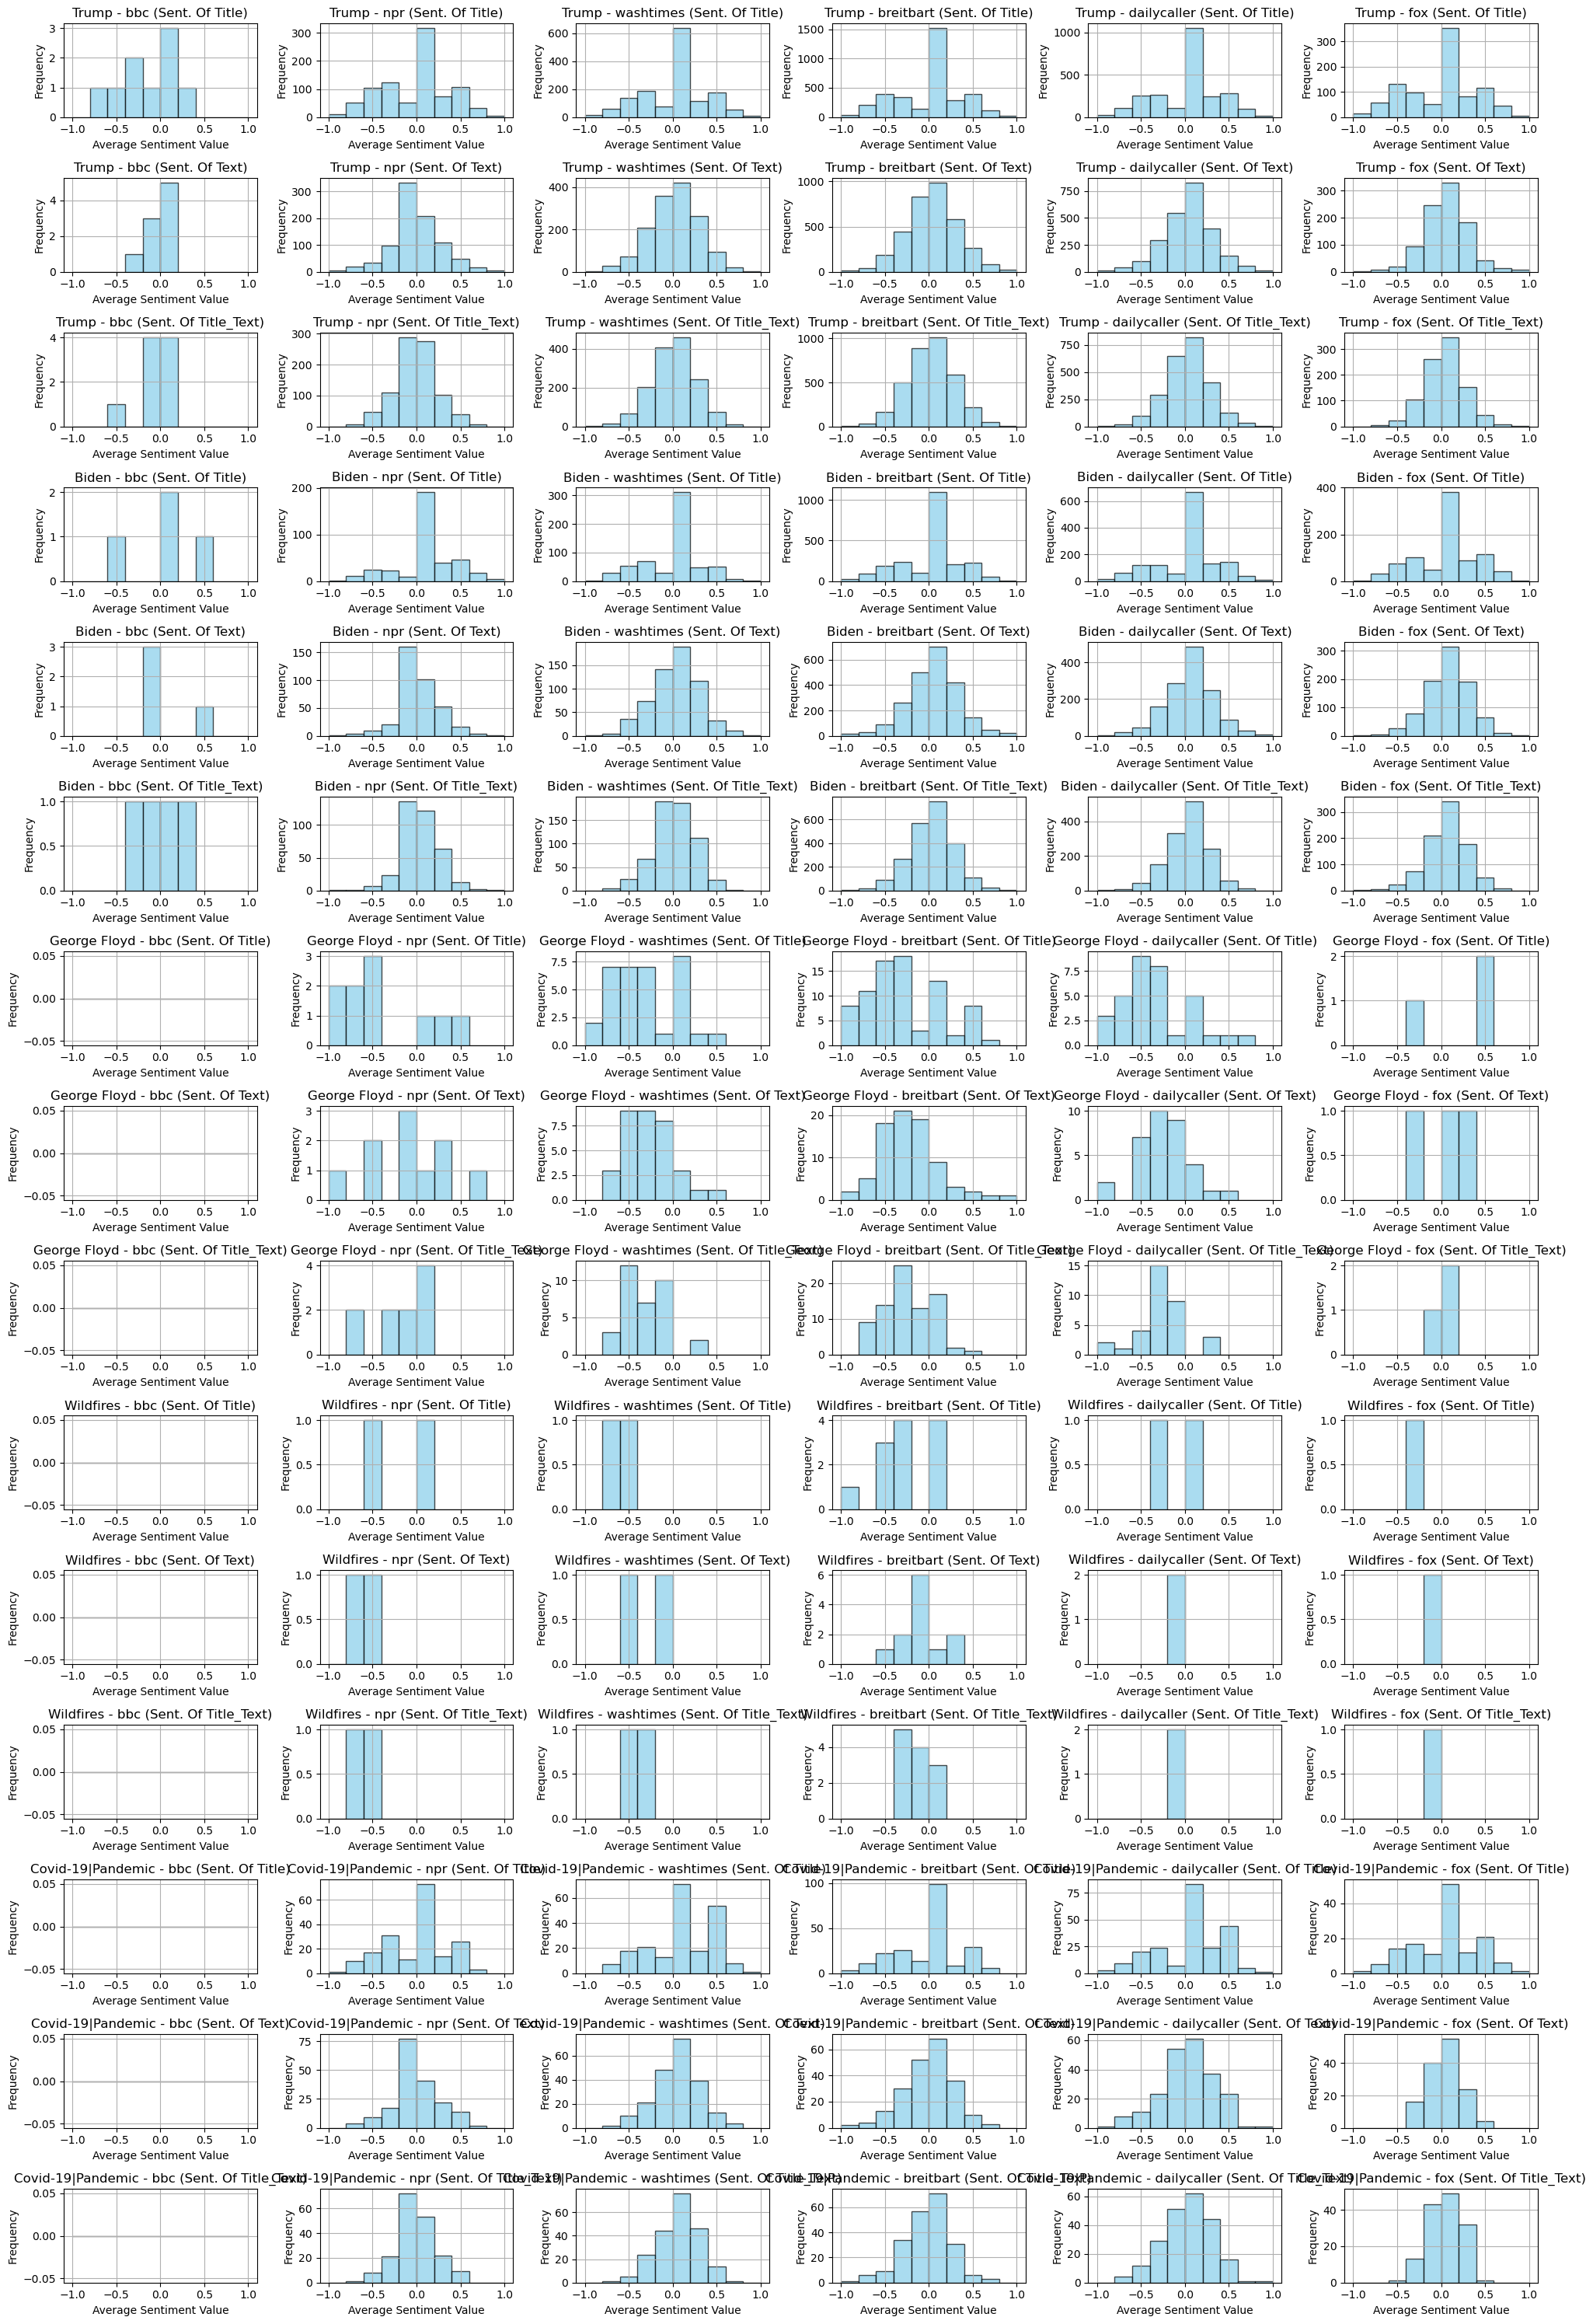

In [250]:
# Define the number of rows and columns for the subplot grid
num_rows = len(keywords)
#num_cols = len(['wp', 'bbc', 'npr', 'washtimes', 'breitbart', 'dailycaller', 'fox', 'thehill'])
num_cols = len(['bbc', 'npr', 'washtimes', 'breitbart', 'dailycaller', 'fox'])

# Create a new figure with subplots
fig, axes = plt.subplots(num_rows * 3, num_cols, figsize=(20, 30))

# Iterate over each topic and source
for i, topic in enumerate(keywords):
    for j, source in enumerate(['bbc', 'npr', 'washtimes', 'breitbart', 'dailycaller', 'fox']):
        # Get the corresponding axes
        axes_title = axes[i*3, j] if num_rows > 1 else axes[j]
        axes_text = axes[i*3+1, j] if num_rows > 1 else axes[j]
        axes_title_text = axes[i*3+2, j] if num_rows > 1 else axes[j]

        # Iterate over each data type
        for k, data_type in enumerate(['average_sentiment_title', 'average_sentiment_text', 'average_sentiment_title_text']):
            subset = topic_subsets[topic]
            subset_source = subset[subset['source'] == source]
            ax = [axes_title, axes_text, axes_title_text][k]  # Select the appropriate axis for the data type

            # Plot histogram
            ax.hist(subset_source[data_type], bins=10, range=(-1, 1), color='skyblue', edgecolor='black', alpha=0.7)
            
            # Set labels and title
            ax.set_xlabel('Average Sentiment Value')
            ax.set_ylabel('Frequency')
            #ax.set_title(f'{topic.title()} - {source} ({data_type.replace("_", " ").title()})')
            ax.set_title(f'{topic.title()} - {source} ({data_type.replace("average_sentiment_", "Sent. of ").title()})')
            ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [254]:
topic_subsets['all articles']['average_sentiment_text']

0       -0.0031
1        0.1497
2        0.7189
3        0.2633
4        0.3185
          ...  
37039    0.4721
37040   -0.0593
37041   -0.0890
37042   -0.0593
37043   -0.0593
Name: average_sentiment_text, Length: 37035, dtype: float64

In [255]:
##average by news source

#summary = df.groupby('source')['average_sentiment'].mean()

for topic in keywords:
    #print(type(topic), topic)
    for data_type in ['average_sentiment_title','average_sentiment_text','average_sentiment_title_text']:
        summary = topic_subsets[topic].groupby('source').agg({data_type: 'mean', 'source': 'count'}).rename(columns={'source': 'observations'}).sort_values(data_type)


        def assign_sentiment_label(score):
            if score >= 0.5:
                return 'positive'
            elif score <= -0.5:
                return 'negative'
            else:
                return 'neutral'

        # Apply the function to create a new column 'sentiment_label'
        summary['sentiment_label'] = summary[data_type].apply(assign_sentiment_label)
        print(topic, data_type)
        print(summary)



Trump average_sentiment_title
             average_sentiment_title  observations sentiment_label
source                                                            
wp                         -0.361200             1         neutral
bbc                        -0.213178             9         neutral
npr                        -0.032072           877         neutral
fox                        -0.028317           947         neutral
breitbart                  -0.024565          3460         neutral
washtimes                  -0.008411          1473         neutral
dailycaller                -0.001585          2446         neutral
thehill                     0.659700             1        positive
Trump average_sentiment_text
             average_sentiment_text  observations sentiment_label
source                                                           
wp                        -0.003100             1         neutral
npr                       -0.000688           877         neutral
bbc    